1. #### 删除重复数据，并输出去重前后的数据量

2. #### 缺失值处理
首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
最后，再次看各列有无缺失值

3. #### 数据变换
将created_at、updated_at转为时间戳

4. #### 数据可视化

4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

去重前的数据量: 20358
去重后的数据量: 19779

去掉gravatar_id列后的缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at        

C:\Users\肖\AppData\Local\Temp\ipykernel_24356\229954470.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data_dedup, palette='Set2')


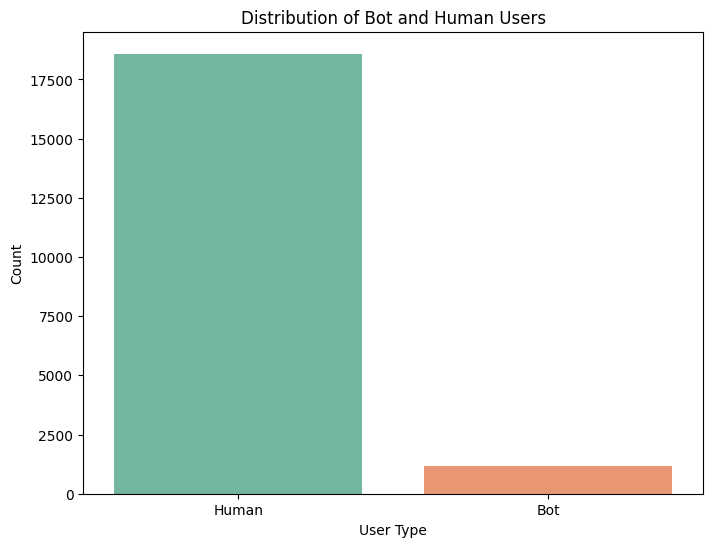


User Type Distribution:
label
Human    18588
Bot       1191
Name: count, dtype: int64


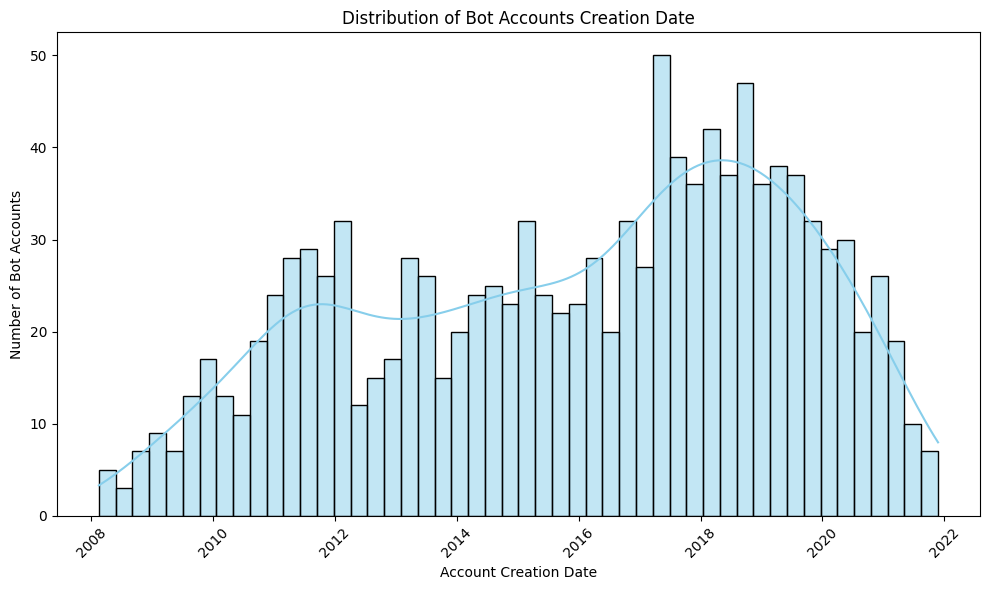

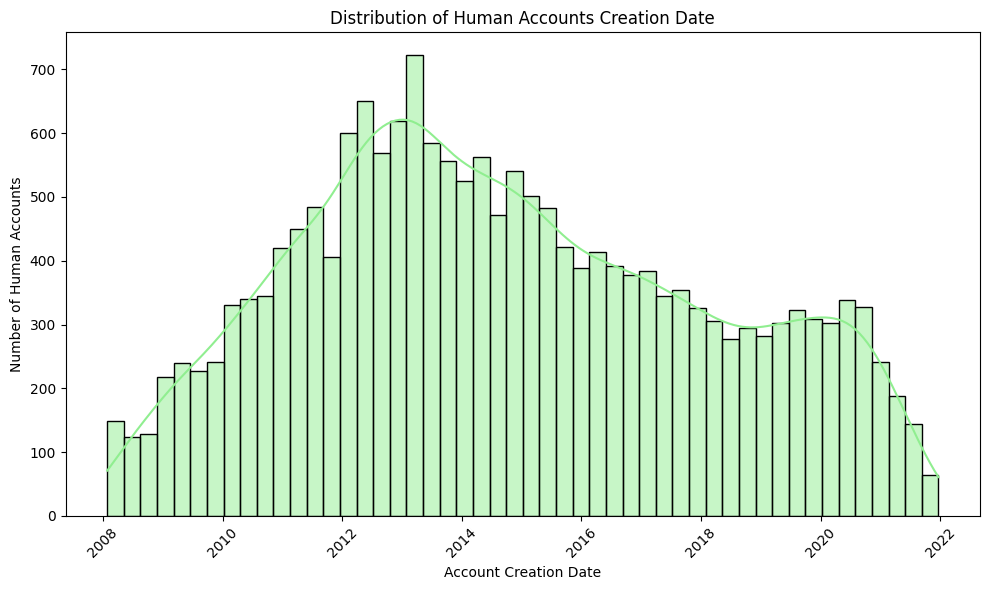

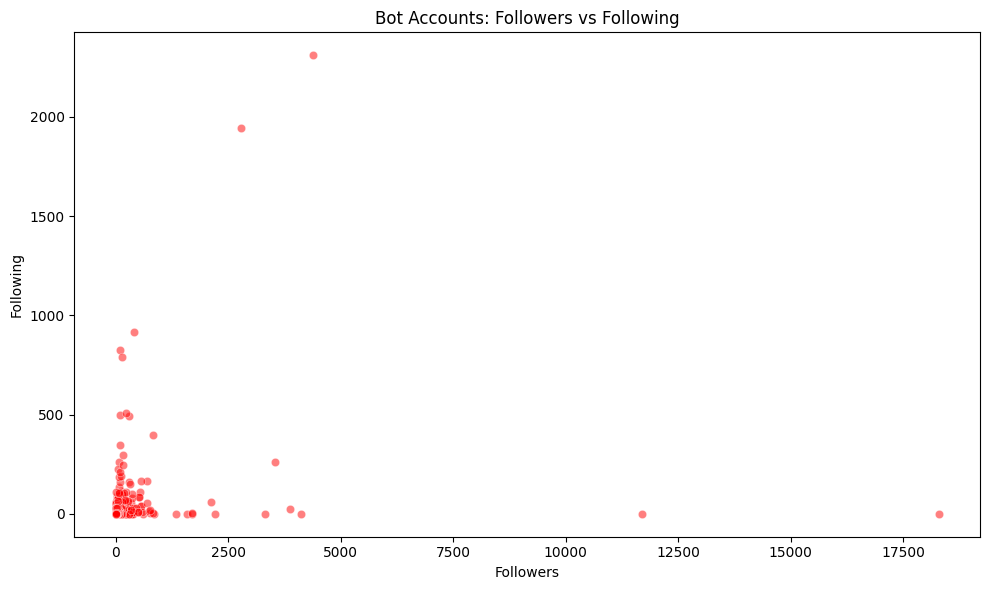

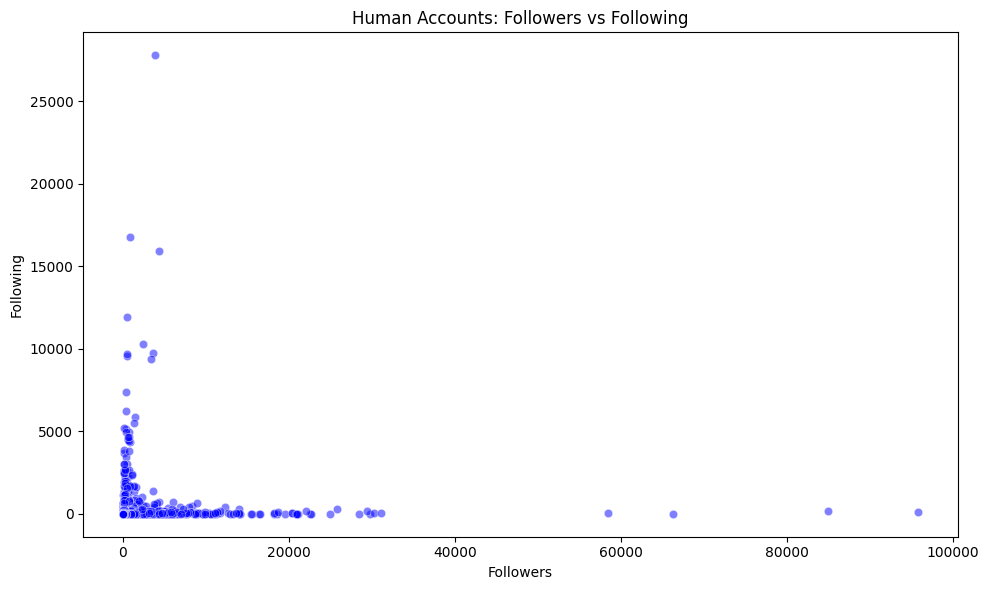

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/github_bot_raw_data.csv'
raw_data = pd.read_csv(file_path)
#列
columns = [
    'actor_id','label','login','id','node_id','avatar_url', 'gravatar_id', 
    'url', 'html_url', 'followers_url', 'following_url', 'gists_url', 
    'starred_url', 'subscriptions_url', 'organizations_url', 'repos_url', 
    'events_url', 'received_events_url', 'type', 'site_admin', 'name', 
    'company', 'blog', 'location', 'email', 'hireable', 'bio', 
    'twitter_username', 'public_repos', 'public_gists', 'followers', 
    'following', 'created_at', 'updated_at'
]
data = raw_data[columns]
#1.删除重复数据，并输出去重前后的数据量
before_dedup = data.shape[0]
data_dedup = data.drop_duplicates()
after_dedup = data_dedup.shape[0]
print("去重前的数据量:", before_dedup)
print("去重后的数据量:", after_dedup)

#2.
#去掉 gravatar_id 列,查看各列缺失值情况
data_dedup = data_dedup.drop(columns=['gravatar_id'])
print("\n去掉gravatar_id列后的缺失值情况：")
print(data_dedup.isnull().sum())
#将可以转化为布尔类型的列转为布尔类型,填充文本数据的缺失值为空字符串
boolean_columns = ['site_admin', 'hireable']  # 可以转换为布尔类型的列
data_dedup[boolean_columns] = data_dedup[boolean_columns].astype('bool')
text_columns = ['company', 'blog', 'location', 'email', 'bio', 'twitter_username','name']
data_dedup[text_columns] = data_dedup[text_columns].fillna('')
#查看处理后的缺失值情况
print("\n处理后的缺失值情况：")
print(data_dedup.isnull().sum())

#3.数据变换，将created_at、updated_at转为时间戳
data_dedup['created_at'] = pd.to_datetime(data_dedup['created_at'], errors='coerce')
data_dedup['updated_at'] = pd.to_datetime(data_dedup['updated_at'], errors='coerce')
data_dedup['created_at_timestamp'] = data_dedup['created_at'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
data_dedup['updated_at_timestamp'] = data_dedup['updated_at'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

#4可视化
#4.1
label_counts = data_dedup['label'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data_dedup, palette='Set2')
plt.title('Distribution of Bot and Human Users')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print("\nUser Type Distribution:")
print(label_counts)

#4.2
bot_data = data_dedup[data_dedup['label'] == 'Bot']
plt.figure(figsize=(10, 6))
sns.histplot(bot_data['created_at'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Bot Accounts Creation Date')
plt.xlabel('Account Creation Date')
plt.ylabel('Number of Bot Accounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4.3
human_data = data_dedup[data_dedup['label'] == 'Human']
plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Human Accounts Creation Date')
plt.xlabel('Account Creation Date')
plt.ylabel('Number of Human Accounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4.4
bot_data = data_dedup[data_dedup['label'] == 'Bot']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='following', data=bot_data, color='red', alpha=0.5)
plt.title('Bot Accounts: Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.tight_layout()
plt.show()

#4.5
human_data = data_dedup[data_dedup['label'] == 'Human']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='following', data=human_data, color='blue', alpha=0.5)
plt.title('Human Accounts: Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.tight_layout()
plt.show()

#### 4.1
选择柱状图，直观地展示了用户类型的绝对数量，以及数量分布差异，对比明显。
显示出human远超bot,推测出该数据集中包含大量真实用户，数据集中自动化行为不会对分析结果产生过多干扰。

#### 4.2
选择柱状图，通过柱状图和KDE曲线观察到bot类型账户的创建时间分布情况。比如图中高峰2018年，可能某些活动刺激了bot用户的创建，比如开源项目的发布。

#### 4.3
选择柱状图，通过柱状图和KDE曲线观察到human类型账户的创建时间分布情况。某些时期，比如2013年附近，出现明显高峰，说明当时可能有大量的 Human 用户涌入 GitHub，例如 GitHub 的宣传或技术潮流的推动。

#### 4.4
选择散点图，可以观察bot类型账户followers和following的相对情况。看点集中颜色较深的区域，发现followers数量较少，following数量较高，说明bot账户是自动化工具，追踪其他用户，追随者比较少。它一般是自动、定向的追随，而不是互动、社交，应该是作为工具使用、抓取数据。

####  4.5
选择散点图。散点图可以显示出human真实用户社交互动情况。可以看出followers和following呈现正相关性，它们的分布更加均衡。个别用户拥有大量followers，following少，说明这些用户是github上知名的开发者或者组织，具有一定的影响力。